# 量子回路の構築
このチュートリアルでは、Qamomile を使った量子回路の構築について学びます。Qamomile は主に量子最適化のために設計されていますが、任意の量子回路を構築するための強力な機能も備えています。このチュートリアルでは、Qamomile 独自の中間表現を用いて、量子回路を作成・操作する方法を紹介します。

## 前提条件
始める前に、以下が Python 環境にインストールされていることを確認してください：

- Qamomile

## はじめに

まずは、Qamomile から必要なモジュールをインポートしましょう：

In [1]:
import qamomile.core as qm

## 量子回路の作成

Qamomile で量子回路を作成するには、まず量子レジスタと古典レジスタを初期化し、それらを用いて QuantumCircuit オブジェクトを作成します：

In [2]:
circuit = qm.circuit.QuantumCircuit(2)  # 2量子ビットの量子回路を作成する

## 回路へのゲートの追加

Qamomile は多くの種類の量子ゲートをサポートしています。以下では、一般的なゲートを回路に追加してみましょう：

In [3]:
# 第一量子ビットにアダマールゲートをかける
circuit.h(0)

# 第一量子ビットを制御、第二量子ビットを標的としてCNOTゲートをかける
circuit.cx(0, 1)

# 第二量子ビットにXゲートをかける
circuit.x(1)

Qamomile がサポートしている量子ゲートは、以下のリンクから確認できます：  
https://jij-inc.github.io/Qamomile/autoapi/core/circuit/circuit/index.html#core.circuit.circuit.QuantumCircuit

## 測定

Qamomile で測定を行うには：

In [4]:
circuit.measure_all()

## 回路の可視化

Qamomile は量子回路を可視化するためのメソッドを提供しています：

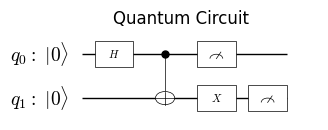

In [5]:
from qamomile.core.circuit.drawer import plot_quantum_circuit

plot_quantum_circuit(circuit)

## 回路の合成

より複雑な回路を作成するために、小さな回路を組み合わせることができます：

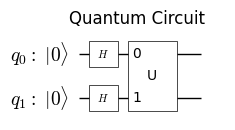

In [6]:
# 二つの独立した量子回路を作成する
circuit1 = qm.circuit.QuantumCircuit(2)
circuit1.h(0)
circuit1.h(1)

circuit2 = qm.circuit.QuantumCircuit(2)
circuit2.cx(0, 1)


circuit1.append(circuit2)

plot_quantum_circuit(circuit1)

`decompose_level` を指定することで、回路をより詳細に表示することができます。

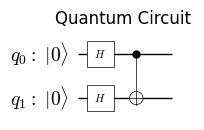

In [7]:
plot_quantum_circuit(circuit1, decompose_level=1)

## 量子回路の実行

Qamomile 自体には量子回路を実行する機能はありませんが、回路を他の量子SDKに変換して実行することができます。

### Qiskit バックエンド

以下は Qamomile の回路を Qiskit を用いて実行する方法です：

1- まず、必要なモジュールをインポートします：

In [8]:
from qamomile.qiskit import QiskitTranspiler
import qiskit.primitives as qk_pr

2- QiskitTranspiler オブジェクトを作成します：

In [9]:
qk_transpiler = QiskitTranspiler()

3- Qamomile の回路を Qiskit の回路に変換（トランスパイル）

In [10]:
qk_circuit = qk_transpiler.transpile_circuit(circuit)

4- 次に、Qiskit の機能を使用して回路を実行できます。たとえば、シミュレーター上で回路を実行するには：

In [11]:
simulator = qk_pr.StatevectorSampler()
job = simulator.run([qk_circuit], shots=1000)
result = job.result()

5- 結果は Qiskit のツールを使って処理および解析できます：

In [12]:
result[0].data['c'].get_counts()

{'01': 479, '10': 521}

### QURI-Parts と Qulacs バックエンド

以下は、QURI-Parts と Qulacs を使用して Qamomile の量子回路を実行する方法です。

Qiskit と同様に、回路を変換して量子回路を実行します。


In [13]:
from qamomile.quri_parts import QuriPartsTranspiler

# 量子回路をQURI-Partsへ変換する
qp_transpiler = QuriPartsTranspiler()
qp_circuit = qp_transpiler.transpile_circuit(circuit)

これで、Qulacs を使って回路を実行できます。

In [14]:
from quri_parts.core.state import quantum_state, apply_circuit
from quri_parts.qulacs.sampler import create_qulacs_vector_sampler

sampler = create_qulacs_vector_sampler()
sampling_result = sampler(qp_circuit, 1000)

In [15]:
sampling_result

Counter({2: 518, 1: 482})

### Pennylane バックエンド

以下は、Qamomile の回路を Pennylane を使って実行する方法です。

Qiskit と同様に、量子回路を変換して実行します。

In [16]:
from qamomile.pennylane import PennylaneTranspiler

# 量子回路をPennylaneへ変換する
qml_transpiler = PennylaneTranspiler()
qml_circuit_func = qml_transpiler.transpile_circuit(circuit)

In [17]:
import pennylane as qml

dev = qml.device("default.qubit", wires=circuit.num_qubits, shots=1000)
@qml.qnode(dev)
def qml_circuit(params):
    qml_circuit_func(params)
        
    return qml.counts()

In [18]:
qml_circuit(None)

{np.str_('01'): np.int64(493), np.str_('10'): np.int64(507)}

## 結論

このチュートリアルでは、Qamomile の中間表現を用いた量子回路の構築方法と、それらを Qiskit や QURI-Parts を使って実行する方法について紹介しました。Qamomile は主に量子最適化に焦点を当てていますが、これらの回路構築機能によって、さまざまな量子計算タスクに対応する柔軟性が得られます。  
Qamomile での量子コンピューティングをお楽しみください！